# [Predict Customer Purchase Behavior](https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset/data)

## About the Dataset

##### **Description**:

This dataset contains information on customer purchase behavior across various attributes, aiming to help data scientist and analysts understand the factors influencing purchase decisions. The dataset includes demographic information, purchasing habits, and other relevant features.

##### **Features**:
* **Age**: Customer's age
* **Gender**: Customer's gender (0: Male, 1: Female)
* **Annual Income**: Annual income of the customer in dollars
* **Number of Purchases**: Total number of purchases made by the customer
* **Product Category**: Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)
* **Time Spent on Website**: Time spent by the customer on the website in minutes
* **Loyalty Program**: Whether the customer is a member of the loyalty program (0: No, 1: Yes)
* **Discount Availed**: Number of discounts availed by the customer (range: 0-5)
* **PurchaseStatus (Target Variable)**: Likelihood of the customer making a purchase (0: No, 1: Yes)

##### **Target Variable**:
**Distribution of the Target Variable (PurchaseStatus)**:
* 0 (No Purchase): 48%
* 1 (Purchase): 52%

##### **Conclusion**:

This dataset provides a balanced and diverse set of features, enabling various analyses such as classification, clustering, and regression tasks to predict and understand customer purchase behavior. 

##### **Dataset Usage and Attribution Notice**:

This dataset, shared by Rabie El Kharoua, is original and has never been shared before. It is made available under the CC BY 4.0 license, allowing anyone to use the dataset in any form as long as proper citation is given to the author. A DOI is provided for proper referencing. Please note that duplication of this work within Kaggle is not permitted.

##### **Exclusively Synthetic Dataset**:

This dataset is synthetic and was generated for educational purposes, making it ideal for data science and machine learning projects. It is an original dataset, owned by Mr. Rabie El Kharoua, and has not been previously shared. The dataset is offered without any guarantees.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

## Import and Examine the Dataset

In [2]:
df = pd.read_csv('customer_purchase_data.csv')

df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [4]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [5]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (1500, 9)


## Exploratory Data Analysis (EDA)

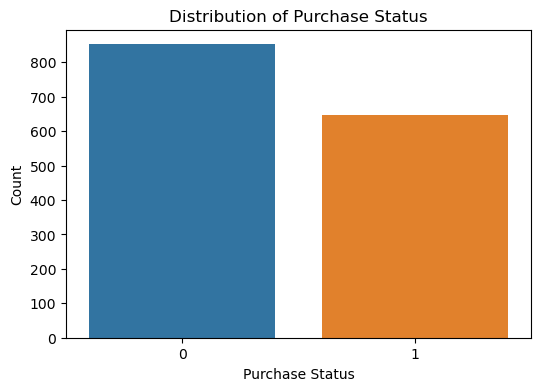

In [6]:
# Distribution of the target variable (PurchaseStatus)

plt.figure(figsize=(6,4))

sns.countplot(x='PurchaseStatus', data=df)
plt.title('Distribution of Purchase Status')
plt.xlabel('Purchase Status')
plt.ylabel('Count')
plt.show()

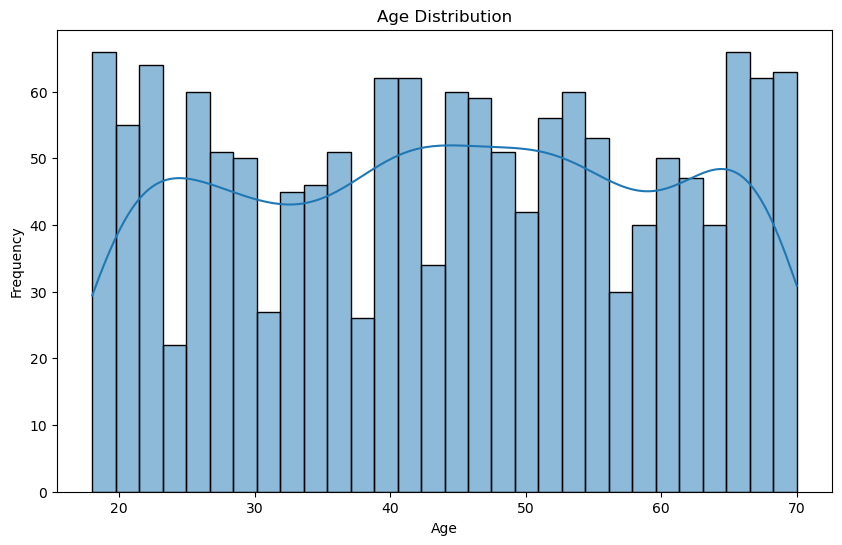

In [7]:
# Age Distribution
plt.figure(figsize=(10,6))

sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

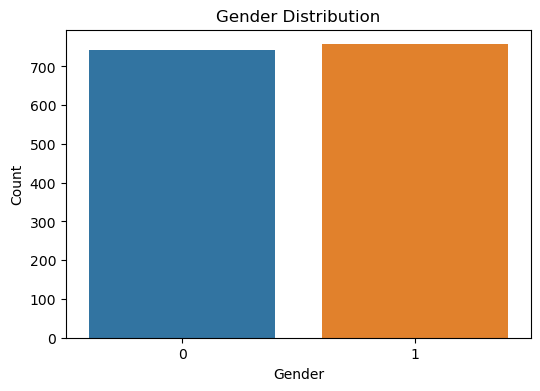

In [8]:
# Gender Distribution
plt.figure(figsize=(6,4))

sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

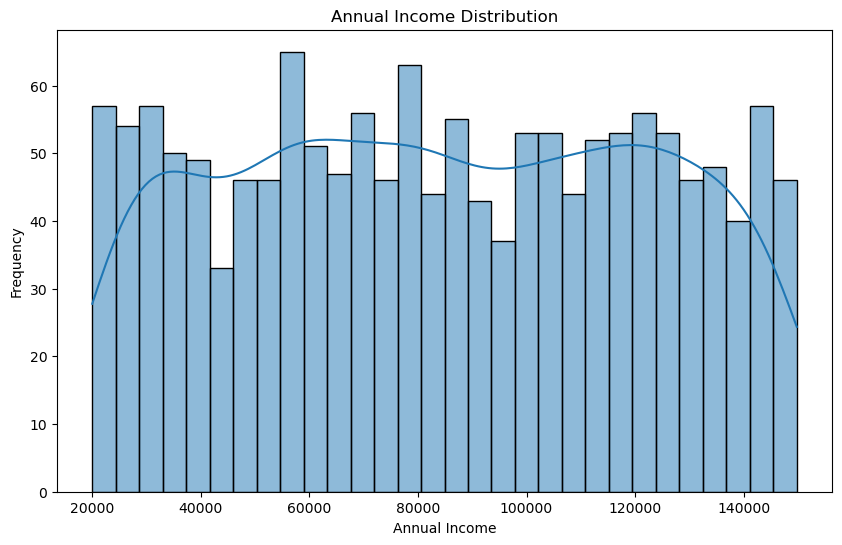

In [9]:
# Annual Income Distribution
plt.figure(figsize=(10,6))

sns.histplot(df['AnnualIncome'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

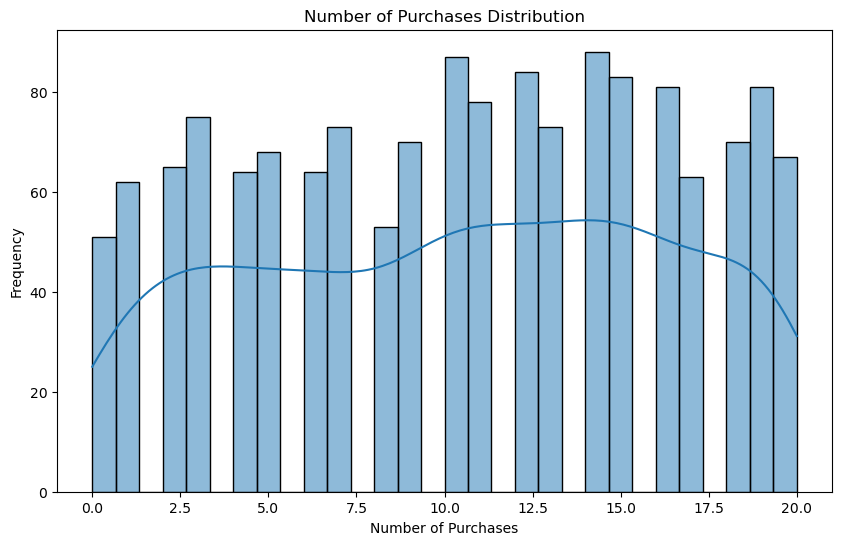

In [10]:
# Number of Purchases Distribution
plt.figure(figsize=(10,6))

sns.histplot(df['NumberOfPurchases'], bins=30, kde=True)
plt.title('Number of Purchases Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()

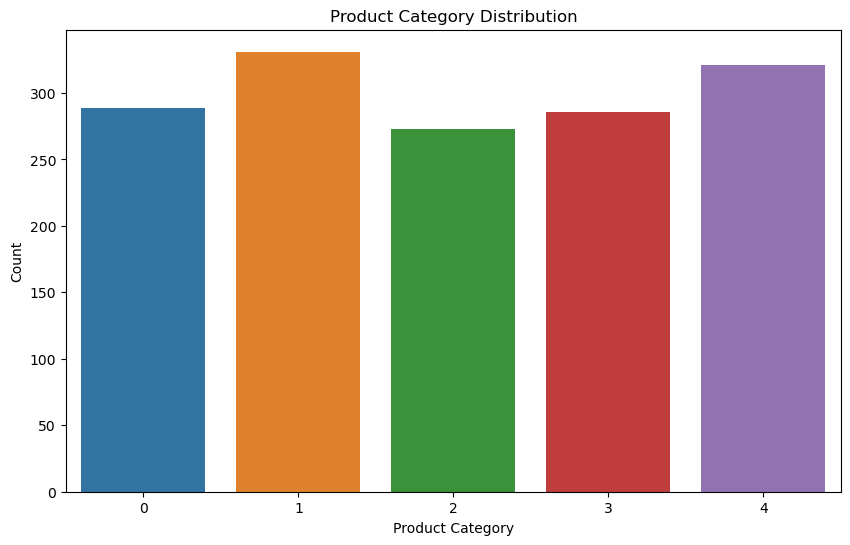

In [12]:
# Product Category Distribution
plt.figure(figsize=(10,6))

sns.countplot(x='ProductCategory', data=df)
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

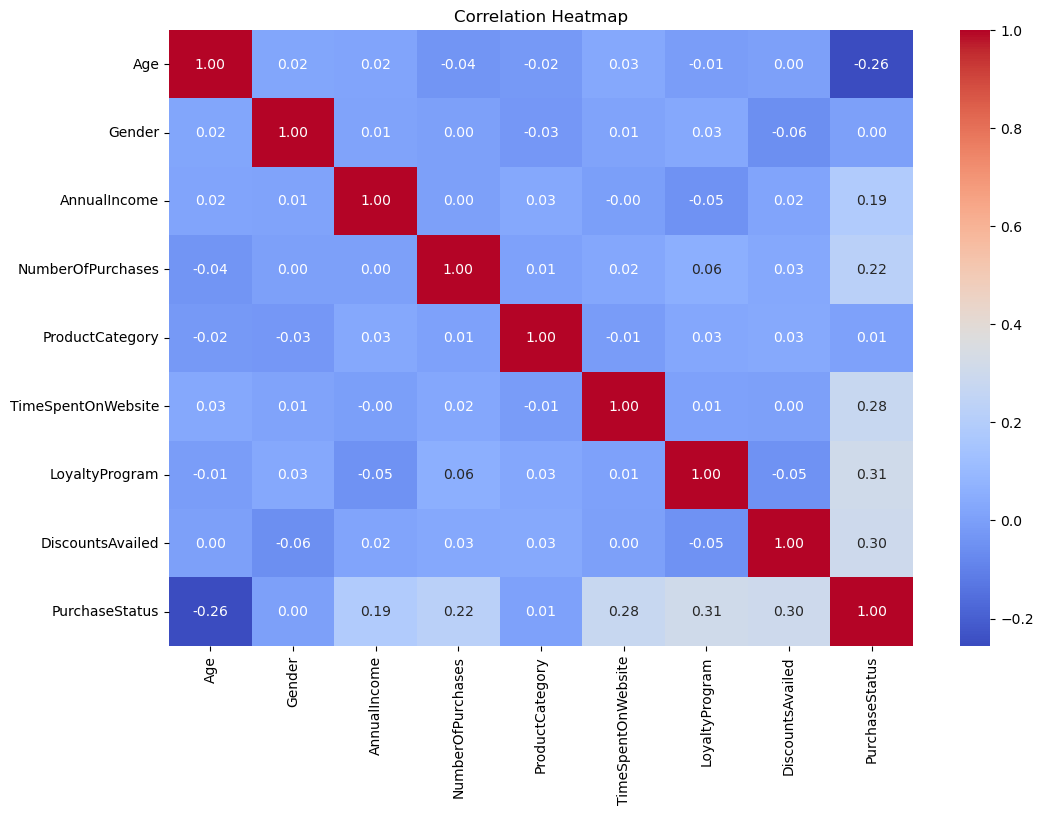

In [13]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Data Preprocessing

In [14]:
# Split the data into features and target variable
X = df.drop(['PurchaseStatus'], axis=1)
y = df['PurchaseStatus']


In [15]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Models

#### **Decision Tree**

In [17]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

Decision Tree Accuracy: 0.90
Decision Tree Precision: 0.91
Decision Tree Recall: 0.84
Decision Tree F1 Score: 0.87


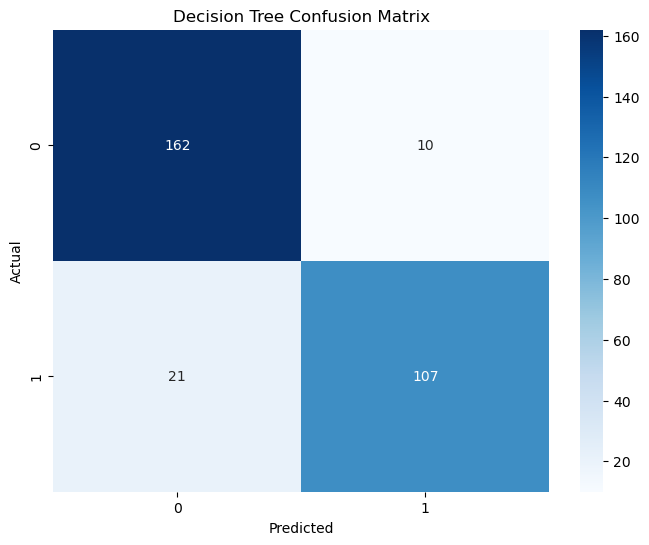

In [18]:
# Decision Tree Evaluation
accuracy_score = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_score:.2f}")

precision_score = precision_score(y_test, y_pred_dt,)
print(f"Decision Tree Precision: {precision_score:.2f}")

recall_score = recall_score(y_test, y_pred_dt)
print(f"Decision Tree Recall: {recall_score:.2f}")

f1_score = f1_score(y_test, y_pred_dt)
print(f"Decision Tree F1 Score: {f1_score:.2f}")

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

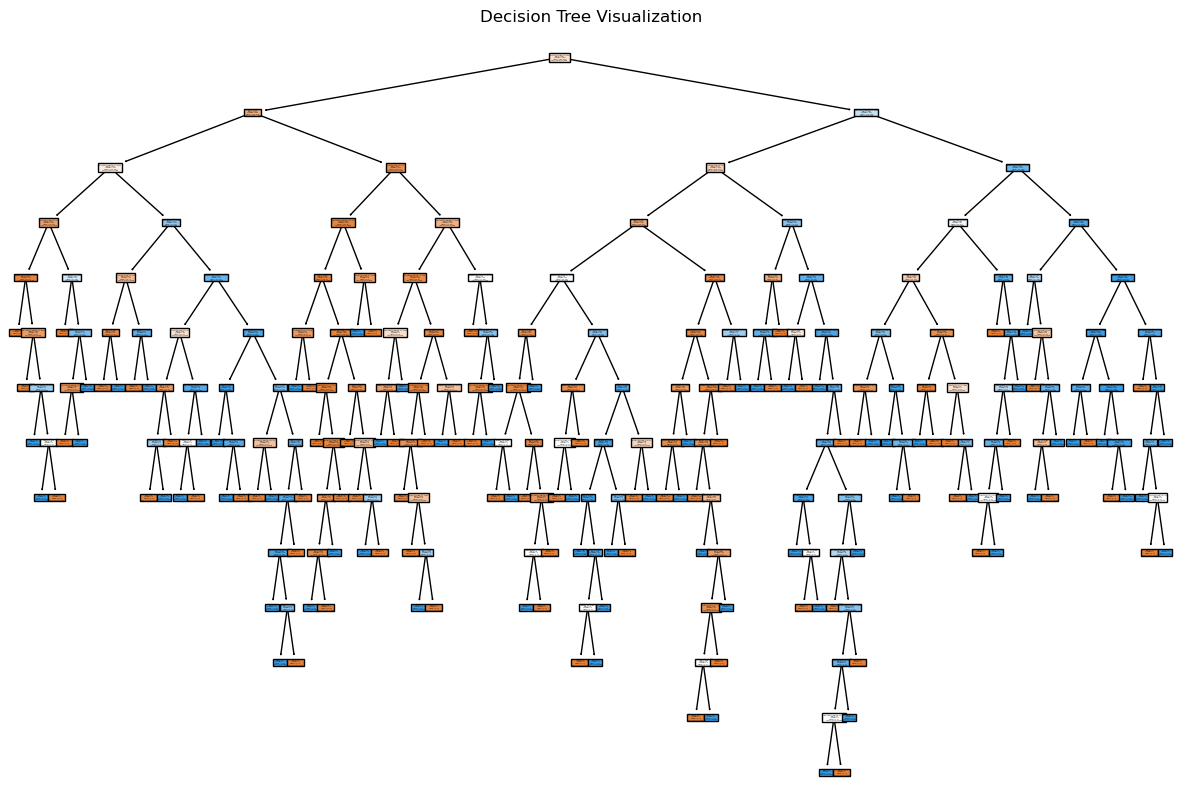

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'])
plt.title('Decision Tree Visualization')
plt.show()

#### **Logistic Regression**

In [21]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

Logistic Regression Accuracy: 0.84
Logistic Regression Precision: 0.88
Logistic Regression Recall: 0.72
Logistic Regression F1 Score: 0.79


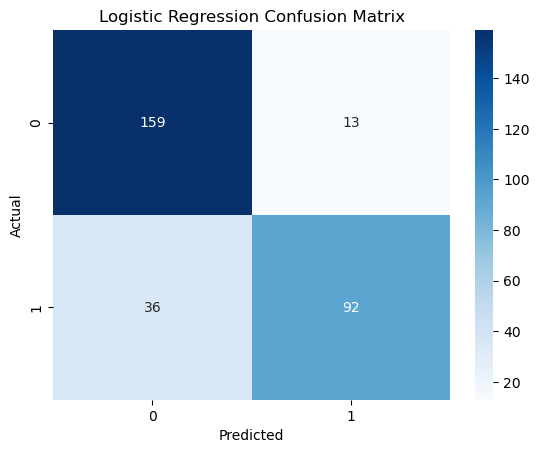

In [25]:
# Logistic Regression Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Logistic Regression Evaluation
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred_lr)
print(f"Logistic Regression Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred_lr)
print(f"Logistic Regression Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred_lr)
print(f"Logistic Regression F1 Score: {f1:.2f}")

cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### **Support Vector Machine**

In [26]:
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

SVM Accuracy: 0.87
SVM Precision: 0.89
SVM Recall: 0.80
SVM F1 Score: 0.84


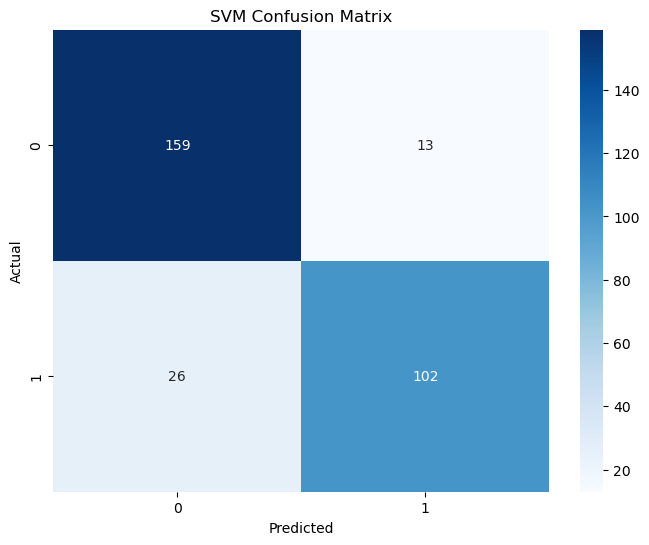

In [28]:
# SVM Evaluation
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred_svm)
print(f"SVM Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred_svm)
print(f"SVM Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred_svm)
print(f"SVM F1 Score: {f1:.2f}")

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **Naive Bayes**

In [29]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)

Naive Bayes Accuracy: 0.84
Naive Bayes Precision: 0.88
Naive Bayes Recall: 0.71
Naive Bayes F1 Score: 0.79


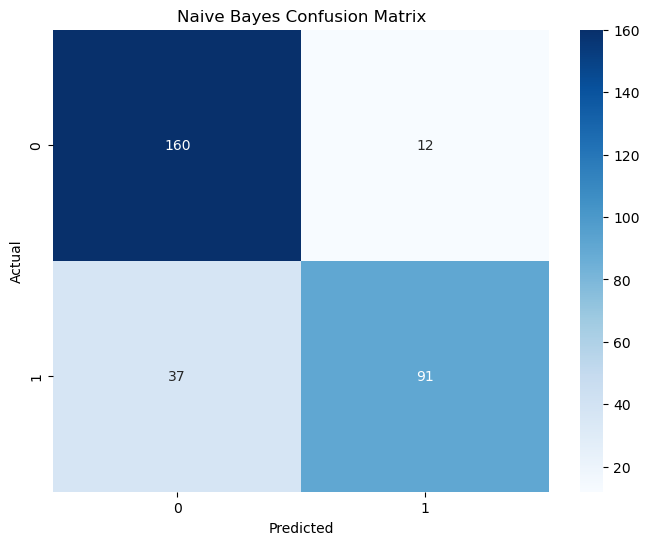

In [32]:
# Naive Bayes Evaluation
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred_nb)
print(f"Naive Bayes Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred_nb)
print(f"Naive Bayes Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred_nb)
print(f"Naive Bayes F1 Score: {f1:.2f}")

cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **Random Forest**

In [31]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

Random Forest Accuracy: 0.95
Random Forest Precision: 0.99
Random Forest Recall: 0.90
Random Forest F1 Score: 0.94


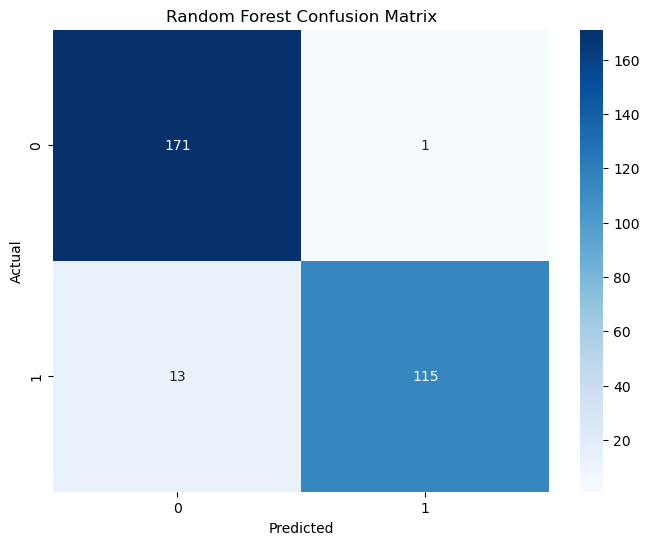

In [33]:
# Random Forest Evaluation
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred_rf)
print(f"Random Forest Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred_rf)
print(f"Random Forest Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred_rf)
print(f"Random Forest F1 Score: {f1:.2f}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Conclusion

The Random Forest classifier emerged as the best model for predicting customer behavior, achieving an accuracy of 95.33%. It also demonstrated a high precision of 99.14%, effectively identifying customers likely to make a purchase, and a recall of 89.84%, capturing a significant proportion of actual purchasers. With an F1 score of 94.26%, the Random Forest model proved to be both reliable and robust for this task.